In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers, optimizers, losses, metrics
from keras.datasets import boston_housing

Using TensorFlow backend.


In [ ]:
(trainx, trainy), (testx, testy) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [ ]:
mean = trainx.mean(axis=0)
trainx -= mean

std = trainx.std(axis=0)
trainx /= std

testx -= mean
testx /= std

In [ ]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(trainx.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer = optimizers.RMSprop(),
              loss = losses.mse,
              metrics = [metrics.mae])

  return model

In [ ]:
# K-fold validation

k=4
scores=[]
mae=[]
epochs=400
val_len = len(trainx)//k

for i in range(k):
  print("processing fold {}".format(i))

  valx = trainx[val_len*i:val_len*(i+1)]
  valy = trainy[val_len*i:val_len*(i+1)]

  new_trainx = np.concatenate([trainx[:i*val_len],
                              trainx[(i+1)*val_len:]], axis=0)
  new_trainy = np.concatenate([trainy[:i*val_len],
                               trainy[(i+1)*val_len:]], axis=0)
  
  model = build_model()

  history = model.fit(new_trainx, new_trainy, epochs=epochs, batch_size=16, verbose=1, validation_data=(valx, valy))
  mae_history = history.history['val_mean_absolute_error']
  mae.append(mae_history)

In [ ]:
average_mae_history = [np.mean([x[i] for x in mae]) for i in range(epochs)]

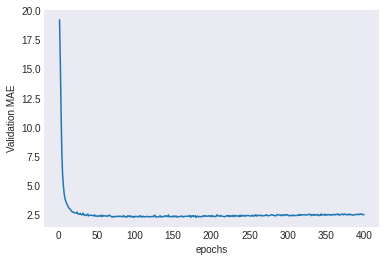

In [ ]:
plt.style.use('seaborn-dark')

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('epochs')
plt.ylabel('Validation MAE')

plt.show()

In [ ]:
def smooth_curve(points, factor=0.9):
  curve=[]
  for point in points:
    if curve:
      previous = curve[-1]
      curve.append(previous*factor + point*(1-factor))
    else:
      curve.append(point)

  return curve

In [ ]:
smooth_points = smooth_curve(average_mae_history[10:])

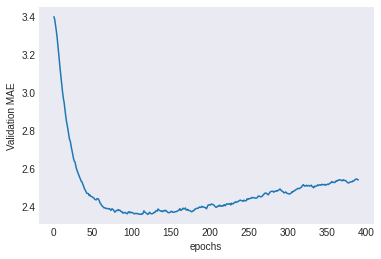

In [ ]:
plt.plot(range(1, len(smooth_points)+1), smooth_points)
plt.xlabel('epochs')
plt.ylabel('Validation MAE')

plt.show()

In [ ]:
model = build_model()
model.fit(trainx, trainy, epochs=120, batch_size=16, verbose=0)

In [ ]:
loss, error = model.evaluate(testx, testy)

102/102 [==============================] - 0s 163us/step


In [ ]:
print(loss, error)

15.56506467333027 2.547403335571289
